#Embeddings en grafos para POIs en planificación de rutas turísticas

**Contexto** y motivación
En el problema TTDP los POIS se represetna de forma simplista mediante sus categorías generales (Turismo sol y playa, cultura, etc), popularidad o atributos individuales, lo cual limita la capacidad de capturar relaciones más sutiles entre ellos. Para mejorar esto, en años recientes se han aplicado **métodos de embedding en grafos** que generan representaciones vectoriales de los POIs incorporando sus relaciones espaciales y semánticas de manera más rica.
Estos vectores (embeddings), reflejan proximidades en el grafo de POIs (sea por cercanía geográfica, similitud temática, o valor de visita), y sirven como insumo para modelos avanzados de recomendación y planificación de itinerarios.
En escencia, **un embedding de grado asigna a cada nodo (POU) un vector en un espacio latente de tal forma que la distancia o similitud entre vectores refleja relaciones en el grafo original.**

## Embeddigns de grafos mediante recorridos aleatorios


DeepWalk y node2vec son métodos clásicos de generación de embeddings para nodos de un grafo usando recorridos aleatorios (random walks). La idea es muy similar a entrenar un modelo tipo Word2Vec en una secuencia de palabaras: Se simulan caminos aleatorios en el grafo y se tratan las secuencias de nofos recorridos como "oraciones", de modo que nodos que tienden a aparecer en contextos similares acaban teniendo vectores cercanos.
En el contexto de POIs, esto permite capturar relaciones de co-visita o proximidad en rutas reales de turistas.

Algunos trabajos han demostrado las ventajas de estos enfoques hO & Lim (2021) https://arxiv.org/abs/2103.02464#:~:text=constraints,of%204%20cities%2C%20preliminary%20experimental

Aplican un modelo tipo Word2Vec sobre secuencias de POIs extraídas de trayectorias de turistas reales, logrando una representación más fina de los POIs que las categorías tradicionales. En su sistema de recomendación de tours personalizados, cada POIS se representa por su embedding aprendido a partir de trayectorias pasadas.

Una variante de node2vec fue empleada por Kumar et al (2023)  para recomendación de siguiente POI en redes LBSN ( Location-Based Social Networks). Ellos contruyeron unn grafo heterogéneo de usuarios y lugares (POIs) a partir de datos de check-ins, y aplican un node2vec modificado para generar vectores de características tanto para usuarios como para ubicaciones.
Estos embeddings luego alimentan un modelo con mecanismos de atención que predice el próximo lugar a visitar.
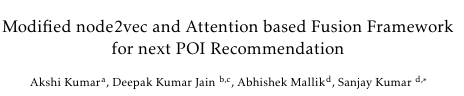


Existen otras aplciaciones donde se combinan embeddings con otras fuentes de información y se trabaja un modelo de recomendación de rutas para robots guía.
https://www.researchgate.net/publication/358217824_Personalized_Travel_Route_Recommendation_Model_of_Intelligent_Service_Robot_Using_Deep_Learning_in_Big_Data_Environment#:~:text=obtained%20by%20the%20Gaussian%20kernel,term

En conclución estos métodos permite capturar la co-ocurrencia y la proximidad entre POIs de manera no supervisada.

##Redes neuronales de grafos (GCN y Variantes) para POIs


Otros autres han explorado el uso de **Graph Neural Networks (GNN)** en particular se destaca el Graph convolutional Networ.
Bajo este enfoque en lugar de recorridos aleatorios, las GNN propagan y agregan información en el grafo siguiendo su estructura, permitiendo combiar atributos de los nodos con la topología de las conexiones.

En el contexto del TTDP esto es util cuando se tienen varias caracteristicas más alla de la cercaná para considerar en los POIs,

Chen et al 2023. Proponen un framework denominado GRM-RTrip para recomendación de viajes personalizados, donde el recorrido es una secuencia ordenada de POIs optimizada según satisfacción del usuario y restricciones de tiempo. ntrenan una representación en la cual la proximidad de dos nodos en el espacio latente indica qué tan viable o común es visitar esos dos POIs consecutivamente. Estas representaciones alimentan luego un algoritmo de Reinforcement Learning (Q-learning) que busca la mejor ruta para el usuario.
https://dl.acm.org/doi/10.1145/3564609

Halder et al. se utiliza un modelo basado en redes neuronales gráficas convolucionales (GCN) para capturar dependencias espaciales no lineales entre los puntos de interés (POIs). Esto permite modelar cómo la influencia o relación entre un POI puede extenderse a varios nodos de distancia en el grafo que representa la red de lugares. Luego, para construir el itinerario, se usa un proceso greedy que selecciona dinámicamente los POIs optimizando las preferencias del usuario y restricciones de tiempo, utilizando las representaciones aprendidas por la GCN
https://www.researchgate.net/publication/376892847_A_Survey_on_Personalized_Itinerary_Recommendation_From_Optimisation_to_Deep_Learning#:~:text=DAC,Aggregation%20for%20Enhanced%20Recommender%20Systems

## Otras líneas
Otras líneas de trabajo combinan Knowledge graphs con GNN para las recomendaciones turísticas.
En estos casos, se construye un grafo de conocimiento donde los POIs están conectados no solo por proximidad geográfica sino tambié por relaciones semánticas.

https://www.mdpi.com/2076-3417/14/20/9271#:~:text=Graph%20Neural%20Networks%20,such%20as%20the%20relationships%20between

## Conclusión
Los embeddigns se integran en modelos de deep learning como RL, RNN o Transformers para genrar la secuencia de POIs.
EN los modelos de RL los embeddings representan el estado del agente y su representación ayuda a maximizar recompensas.
En arquitecturas como CN + Transformers los embeddings se ahystab dinámicamente según el contexto del tour.

In [ ]:
# Instancia pequeña (tipo hptoptw-j11a)
# Formato: (id, x, y, service, score, tw_open, tw_close)

nodes = [
    (0,  53, 46,   0,  0,   1, 700),  # depósito
    (1,  43, 32,  90, 20,  29, 101),
    (2,  46, 56,  90, 20, 115, 183),
    (3,  33, 54,  90, 10, 496, 595),
    (4,  49, 23,  90, 20, 235, 318),
    (5,  60, 45,  90, 10, 119, 198),
    (6,  47, 40,  90, 30,  16, 108),
    (7,  36, 41,  90, 10, 392, 475),
    (8,  53, 57,  90, 20, 108, 183),
    (9,  51, 25,  90, 10, 160, 233),
    (10, 55, 34,  90, 30,  51, 123),
]

# Parámetros globales
T = 700.0     # horizonte total (min) 11 horas y 40 minutos.
speed = 1.0   # min por unidad de distancia euclídea (1 = simple)

# Accesos por nombre (más fácil de leer abajo)
#id: número de vertices
#x: coordenada en X
#Y: coordenada en Y
#service: Duración de la visita
#score: Beneficio de la visita
#tw_open: inicio de la ventana de tiempo
#tw_close: fin de la ventana de tiempo
IDX = { 'id':0, 'x':1, 'y':2, 'service':3, 'score':4, 'tw_open':5, 'tw_close':6 }


print("Nodos cargados:", len(nodes))


Nodos cargados: 11


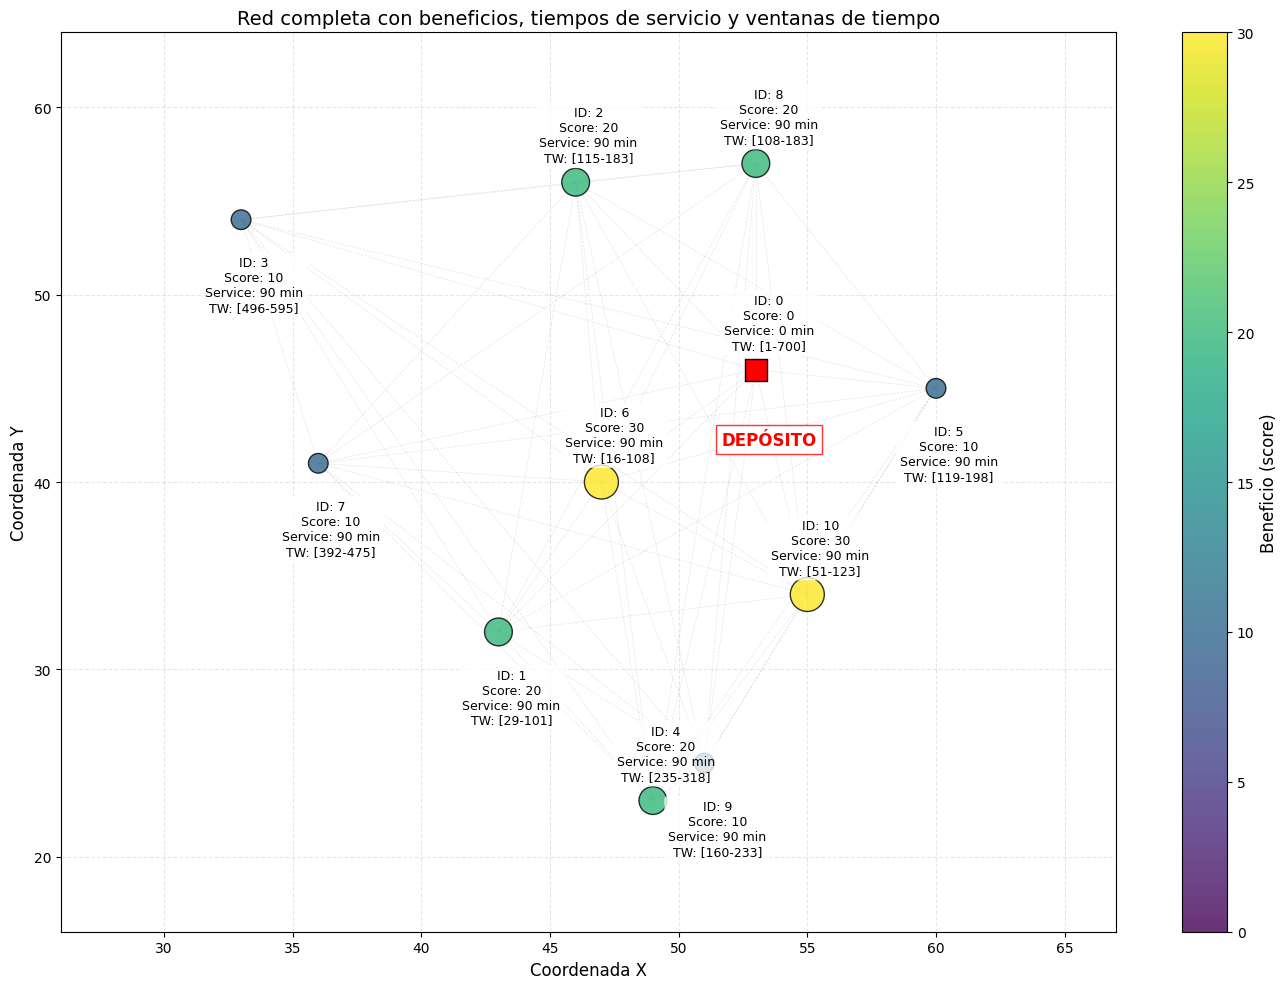

In [ ]:
import matplotlib.pyplot as plt

# Extraer datos de los nodos
x_coords = [node[IDX['x']] for node in nodes]
y_coords = [node[IDX['y']] for node in nodes]
node_ids = [node[IDX['id']] for node in nodes]
scores = [node[IDX['score']] for node in nodes]
services = [node[IDX['service']] for node in nodes]
tw_opens = [node[IDX['tw_open']] for node in nodes]
tw_closes = [node[IDX['tw_close']] for node in nodes]

# Configurar el gráfico
plt.figure(figsize=(14, 10))

# Dibujar todas las conexiones entre nodos
for i in range(len(nodes)):
    for j in range(i+1, len(nodes)):
        plt.plot(
            [x_coords[i], x_coords[j]],
            [y_coords[i], y_coords[j]],
            color='gray',
            linestyle='--',
            linewidth=0.5,
            alpha=0.2
        )

# Crear el scatter plot con tamaño proporcional al beneficio (score)
scatter = plt.scatter(
    x_coords, y_coords,
    c=scores,
    s=[s*20 for s in scores],
    cmap='viridis',
    alpha=0.8,
    edgecolors='black',
    zorder=10
)

# Añadir barra de color para el beneficio
cbar = plt.colorbar(scatter)
cbar.set_label('Beneficio (score)', fontsize=12)

# Añadir etiquetas con toda la información
for i, (x, y, node_id, score, service, tw_open, tw_close) in enumerate(
    zip(x_coords, y_coords, node_ids, scores, services, tw_opens, tw_closes)):

    # Crear texto con toda la información
    info_text = (f"ID: {node_id}\n"
                 f"Score: {score}\n"
                 f"Service: {service} min\n"
                 f"TW: [{tw_open}-{tw_close}]")

    # Ajustar posición vertical según el nodo para evitar solapamientos
    vertical_offset = 2.5 if i % 2 == 0 else -3.5

    plt.text(
        x + 0.5, y + vertical_offset,
        info_text,
        fontsize=9,
        ha='center',
        va='center',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'),
        zorder=20
    )

    # Resaltar el depósito (nodo 0)
    if node_id == 0:
        plt.scatter(x, y, color='red', s=250, marker='s', edgecolor='black', zorder=15)
        plt.text(
            x + 0.5, y - 4.0,
            'DEPÓSITO',
            fontsize=12,
            color='red',
            weight='bold',
            ha='center',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'),
            zorder=20
        )

# Añadir detalles del gráfico
plt.title('Red completa con beneficios, tiempos de servicio y ventanas de tiempo', fontsize=14)
plt.xlabel('Coordenada X', fontsize=12)
plt.ylabel('Coordenada Y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Ajustar los límites para mejor visualización
plt.xlim(min(x_coords)-7, max(x_coords)+7)
plt.ylim(min(y_coords)-7, max(y_coords)+7)

plt.tight_layout()
plt.show()

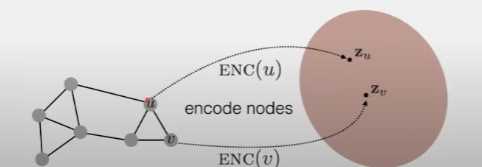

Qué se debe definir?
1. Definir una función de encoding (mapeo)
2. Qué significa que dos nodos sean similares en la red original?

**Algoritmo Random walks.**
Moverse de forma aleatoria y determinar así si 2 putntos son similares



In [ ]:
!pip -q install gensim


Cargar la instancia (hptoptw‑j11a)

In [ ]:
from math import sqrt
import numpy as np
import pandas as pd

# Instancia pequeña (tipo hptoptw-j11a)
# (id, x, y, service, score, tw_open, tw_close)
nodes = [
    (0,  53, 46,   0,  0,   1, 700),  # depósito
    (1,  43, 32,  90, 20,  29, 101),
    (2,  46, 56,  90, 20, 115, 183),
    (3,  33, 54,  90, 10, 496, 595),
    (4,  49, 23,  90, 20, 235, 318),
    (5,  60, 45,  90, 10, 119, 198),
    (6,  47, 40,  90, 30,  16, 108),
    (7,  36, 41,  90, 10, 392, 475),
    (8,  53, 57,  90, 20, 108, 183),
    (9,  51, 25,  90, 10, 160, 233),
    (10, 55, 34,  90, 30,  51, 123),
]

cols = ["id","x","y","service","score","tw_open","tw_close"]
df = pd.DataFrame(nodes, columns=cols).sort_values("id").reset_index(drop=True)
ids = df["id"].tolist()

print(df)


    id   x   y  service  score  tw_open  tw_close
0    0  53  46        0      0        1       700
1    1  43  32       90     20       29       101
2    2  46  56       90     20      115       183
3    3  33  54       90     10      496       595
4    4  49  23       90     20      235       318
5    5  60  45       90     10      119       198
6    6  47  40       90     30       16       108
7    7  36  41       90     10      392       475
8    8  53  57       90     20      108       183
9    9  51  25       90     10      160       233
10  10  55  34       90     30       51       123


Matrices de distancia y tiempo

In [ ]:
# Distancia euclídea y tiempo = distancia/speed (speed=1)
coord = {r.id: (r.x, r.y) for r in df.itertuples()}
n = len(ids)

def dist(a,b):
    (x1,y1),(x2,y2) = coord[a], coord[b]
    return sqrt((x1-x2)**2 + (y1-y2)**2)

D = np.zeros((n,n))
T = np.zeros((n,n))
for i,u in enumerate(ids):
    for j,v in enumerate(ids):
        if u==v: continue
        d = dist(u,v)
        D[i,j] = d
        T[i,j] = d  # speed=1

pd.DataFrame(D, index=ids, columns=ids).head()


,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,17.204651,12.206556,21.540659,23.345235,7.071068,8.485281,17.720045,11.000000,21.095023,12.165525
1,17.204651,0.000000,24.186773,24.166092,10.816654,21.400935,8.944272,11.401754,26.925824,10.630146,12.165525
2,12.206556,24.186773,0.000000,13.152946,33.136083,17.804494,16.031220,18.027756,7.071068,31.400637,23.769729
3,21.540659,24.166092,13.152946,0.000000,34.885527,28.460499,19.798990,13.341664,20.223748,34.132096,29.732137
4,23.345235,10.816654,33.136083,34.885527,0.000000,24.596748,17.117243,22.203603,34.234486,2.828427,12.529964


Grafo K-NN y random walks simples
*   Conectamos cada nodo con sus k vecinos más cercanos por distancia.
*   Generamos caminatas aleatorias sobre ese grafo (DeepWalk casero).





In [ ]:
import random
random.seed(42)

k = 3  # 3 vecinos por nodo

# Lista de vecinos por id (usamos índices en 'ids')
neighbors = {u:[] for u in ids}
for i,u in enumerate(ids):
    order = np.argsort(D[i])  # de más cerca a más lejos (incluye a sí mismo en pos 0)
    count = 0
    for j in order:
        v = ids[j]
        if u==v: continue
        neighbors[u].append(v)
        count += 1
        if count >= k:
            break

# Ver un ejemplo de vecindad
neighbors[6]


[0, 1, 10]

In [ ]:
# Random walk simple sobre la lista de vecinos (no ponderado)
def random_walk(start, walk_length=1000):
    walk = [start]
    cur = start
    for _ in range(walk_length-1):
        cand = neighbors[cur]
        if not cand: break
        cur = random.choice(cand)
        walk.append(cur)
    return walk

# Generar corpus de "oraciones" (secuencias de nodos) como en DeepWalk
num_walks_per_node = 40000
walk_length = 9

corpus = []
for _ in range(num_walks_per_node):
    for u in ids:
        w = random_walk(u, walk_length=walk_length)
        # Word2Vec usa strings como tokens
        corpus.append([str(x) for x in w])

# Ver ejemplo
corpus[:3]


[['0', '8', '2', '8', '5', '10', '9', '4', '9'],
 ['1', '4', '9', '1', '4', '10', '9', '1', '9'],
 ['2', '8', '2', '8', '2', '8', '5', '8', '2']]

In [ ]:
!pip -q install --upgrade --force-reinstall "scipy==1.11.4" "gensim==4.3.2"


ERROR: Operation cancelled by user


Entrenar Word2Vec

In [ ]:
from gensim.models import Word2Vec
import numpy as np

vector_size = 9
window = 5
min_count = 1
sg = 1
epochs = 10

w2v = Word2Vec(
    sentences=corpus,   # <-corpus de random walks
    vector_size=vector_size,
    window=window,
    min_count=min_count,
    sg=sg,
    workers=1,
    epochs=epochs,
    seed=42
)

emb = np.vstack([w2v.wv[str(u)] for u in ids])  # <- tu 'ids'
emb.shape

ModuleNotFoundError: No module named 'gensim'

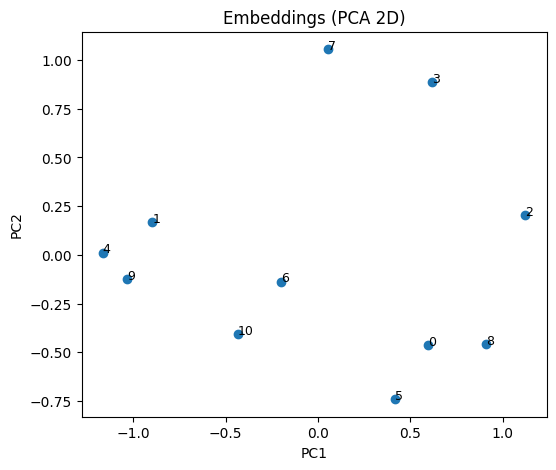

In [ ]:
import matplotlib.pyplot as plt

# PCA 2D "a mano" con SVD
X = emb - emb.mean(axis=0, keepdims=True)
U,S,Vt = np.linalg.svd(X, full_matrices=False)
X2 = X @ Vt[:2].T  # proyección 2D

plt.figure(figsize=(6,5))
plt.scatter(X2[:,0], X2[:,1])
for i,u in enumerate(ids):
    plt.text(X2[i,0], X2[i,1], str(u), fontsize=9)
plt.title("Embeddings (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


In [ ]:
from numpy.linalg import norm

def topk_similares(u, k=5):
    i = ids.index(u)
    vu = emb[i]
    sims = []
    for j,v in enumerate(ids):
        if v==u: continue
        s = float(np.dot(vu, emb[j]) / (norm(vu)*norm(emb[j]) + 1e-9))
        sims.append((v, s))
    sims.sort(key=lambda t: -t[1])
    return sims[:k]

print("Top-5 similares a 6:", topk_similares(6, k=5))
print("Top-5 similares a 2:", topk_similares(2, k=5))


Top-5 similares a 6: [(3, 0.9631870091306909), (9, 0.9626220108497213), (10, 0.9584662832111036), (5, 0.9440109200046525), (2, 0.9428275308936918)]
Top-5 similares a 2: [(8, 0.9882404955104167), (5, 0.9732400989881547), (1, 0.9651907875841639), (7, 0.9544005708914347), (10, 0.9454485741377511)]


In [ ]:
def greedy_route(start=0, T_budget=250.0, alpha=1.0, beta=0.05):
    # score = alpha * sim_coseno(embedding) - beta * travel_time
    route = [start]
    time_used = 0.0
    cur = start
    unvis = set(ids) - {start}

    i_cur = ids.index(cur)
    v_cur = emb[i_cur]

    def sim(i,j):
        a,b = emb[i], emb[j]
        return float(np.dot(a,b) / (norm(a)*norm(b) + 1e-9))

    while unvis:
        cand = []
        for v in list(unvis):
            t_add = T[ids.index(cur), ids.index(v)]
            if time_used + t_add > T_budget:
                continue
            s = sim(ids.index(cur), ids.index(v))
            score = alpha * s - beta * t_add
            cand.append((v, score, t_add))
        if not cand:
            break
        cand.sort(key=lambda t: -t[1])
        v, sc, t_add = cand[0]
        route.append(v)
        unvis.remove(v)
        cur = v
        time_used += t_add

    return route, time_used

r, tt = greedy_route(start=0, T_budget=250, alpha=1.0, beta=0.08)
print("Ruta greedy (toy):", r, " | tiempo:", round(tt,1))


Ruta greedy (toy): [0, 5, 10, 6, 1, 4, 9, 7, 3, 2, 8]  | tiempo: 107.2


tourist Trip Design Problem (TTDP), un problema de optimización combinatoria aplicado al turismo.
En pocas palabras, el TTDP busca diseñar itinerarios de viaje óptimos (qué lugares visitar, en qué orden y en qué tiempo) considerando:

Puntos de interés (POIs) con horarios y tiempos de visita.

Restricciones de ventanas de tiempo y duración de servicios.

Preferencias y perfiles de turistas.

Variaciones reales como tráfico y limitaciones de recursos.

aplicación de Inteligencia Artificial y Representación de Datos para resolver el TTDP.
Se plantea pasar de métodos tradicionales basados en heurísticas a métodos modernos de aprendizaje automático y representaciones en grafos.

##Ajuste de propuesta
**Semana 5 — Baseline técnico**

Objetivo: Tener un punto de referencia inicial.
Se implementa un baseline sencillo (por ejemplo, greedy básico o GRASP.VND), solo para establecer métricas de comparación.

**Semana 6 — Embeddings estructurales**

Objetivo: Representar los POIs en un espacio vectorial basado en la estructura del grafo.
Se entrenan **Node2Vec/DeepWalk** sobre grafos POI–POI y se generan embeddings estructurales que capturan relaciones espaciales/temporales.

**Semana 7 — Comparación: Baseline vs. Embeddings estructurales**

Objetivo: Evaluar el valor agregado de los embeddings estructurales frente al baseline.
Se comparan métricas de score, número de POIs, factibilidad y tiempo de cómputo usando ambos enfoques. El objetivo es cuantificar la mejora que trae la representación de grafo.

**Semana 8 — Comparación: Estructural vs. Semántico**

Objetivo: Analizar si añadir semántica mejora la representación.
Se construyen embeddings enriquecidos con categorías u otras señales y se comparan frente a los embeddings puramente estructurales.

**Semana 9 — Comparación: Embeddings vs. Link Scorer**

Objetivo: Evaluar un modelo supervisado de transiciones frente a embeddings sin modelo.
Se entrena un MLP para puntuar enlaces y se compara su desempeño con el uso directo de similitudes entre embeddings.

**Semana 10 — Comparación: Link Scorer vs. Refinamiento (GNN o tuning)**

Objetivo: Ver si una arquitectura más avanzada (GNN o refinamiento Node2Vec) supera al link scorer básico.
Se corre una comparación entre el scorer entrenado y una versión refinada con embeddings mejorados.

**Semana 11 — Experimentos sistemáticos**

Objetivo: Ejecutar todas las comparaciones de manera formal.
Se realizan experimentos bajo el mismo protocolo para baseline, embeddings estructurales, embeddings semánticos, link scorer y refinamiento. Se incluyen ablations para identificar los componentes más relevantes.

**Semana 12 — Consolidación y documento técnico**

Objetivo: Unificar resultados y preparar el informe final.
Se organiza el pipeline para poder correr cualquier método desde la línea de comandos y se redactan capítulos de metodología y resultados, centrados en la comparación entre enfoques en lugar de la integración heurística.